In [60]:
import pandas as pd 
import numpy as np  
df=pd.read_csv('house_data_train.csv', index_col = 0) 
df1 = df.dropna()
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620000e+04,1.620000e+04,16200.000000,16200.000000,16200.000000,1.620000e+04,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000
mean,4.569145e+09,5.416068e+05,3.367469,2.112701,2081.468580,1.498738e+04,1.492346,0.007963,0.237222,3.410185,7.656111,1789.841728,291.626852,1970.834321,85.869938,98077.673457,47.560042,-122.213002,1987.785679,12851.768025
std,2.872391e+09,3.734409e+05,0.902612,0.768567,920.421749,3.962310e+04,0.536900,0.088882,0.768835,0.652050,1.170221,831.040361,443.255808,29.459136,405.004756,53.559732,0.138631,0.141489,683.653615,27857.041383
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,399.000000,651.000000
25%,2.122057e+09,3.220000e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471800,-122.328000,1490.000000,5100.000000
50%,3.902900e+09,4.520000e+05,3.000000,2.250000,1920.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7628.000000
75%,7.304300e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.063025e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677900,-122.123000,2370.000000,10095.250000
max,9.895000e+09,7.700000e+06,10.000000,8.000000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [61]:
X = df1[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df1['price']

# X,y

In [62]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the k most relevant features
kbest = SelectKBest(f_regression, k=5)
X_new = kbest.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[kbest.get_support()]

# Print the selected features in descending order of relevance
scores = -np.log10(kbest.pvalues_[kbest.get_support()])
selected_features = selected_features[scores.argsort()][::-1]
# Get the indices of the selected features
indices = kbest.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[indices]

# Sort the selected features by their score
scores = kbest.scores_[indices]
sorted_features = [feature for _, feature in sorted(zip(scores, selected_features), reverse=True)]

# Print the selected features in descending order
for i, feature in enumerate(sorted_features):
    print(f"{i+1}. {feature}")



1. sqft_living
2. grade
3. sqft_above
4. sqft_living15
5. bathrooms


C:\Users\timez\AppData\Local\Temp\ipykernel_23128\2417662144.py:11: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(kbest.pvalues_[kbest.get_support()])


In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Select the features
X = df1[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
y = df1['price']

# Define the pipeline
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5)),
    ('model', Lasso(alpha=0.1, max_iter=10000)) # version 1.2
    # ('model', Lasso(alpha=0.1, max_iter=10000, normalize=True)) #version <= 1.0
])

# Fit the model
pipeline.fit(X, y)

C:\Users\timez\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.994e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('model', Lasso(alpha=0.1, max_iter=10000))])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make predictions on the training set
y_pred_train = pipeline.predict(X_train)

# Calculate the performance metrics on the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the performance metrics for the training set
print(f'Training set: MAE = {mae_train:.2f}, MSE = {mse_train:.2f}, R2 = {r2_train:.2f}')

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate the performance metrics on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics for the test set
print(f'Test set: MAE = {mae_test:.2f}, MSE = {mse_test:.2f}, R2 = {r2_test:.2f}')

Training set: MAE = 147584.56, MSE = 50691579259.56, R2 = 0.67
Test set: MAE = 146171.60, MSE = 46087625001.35, R2 = 0.58


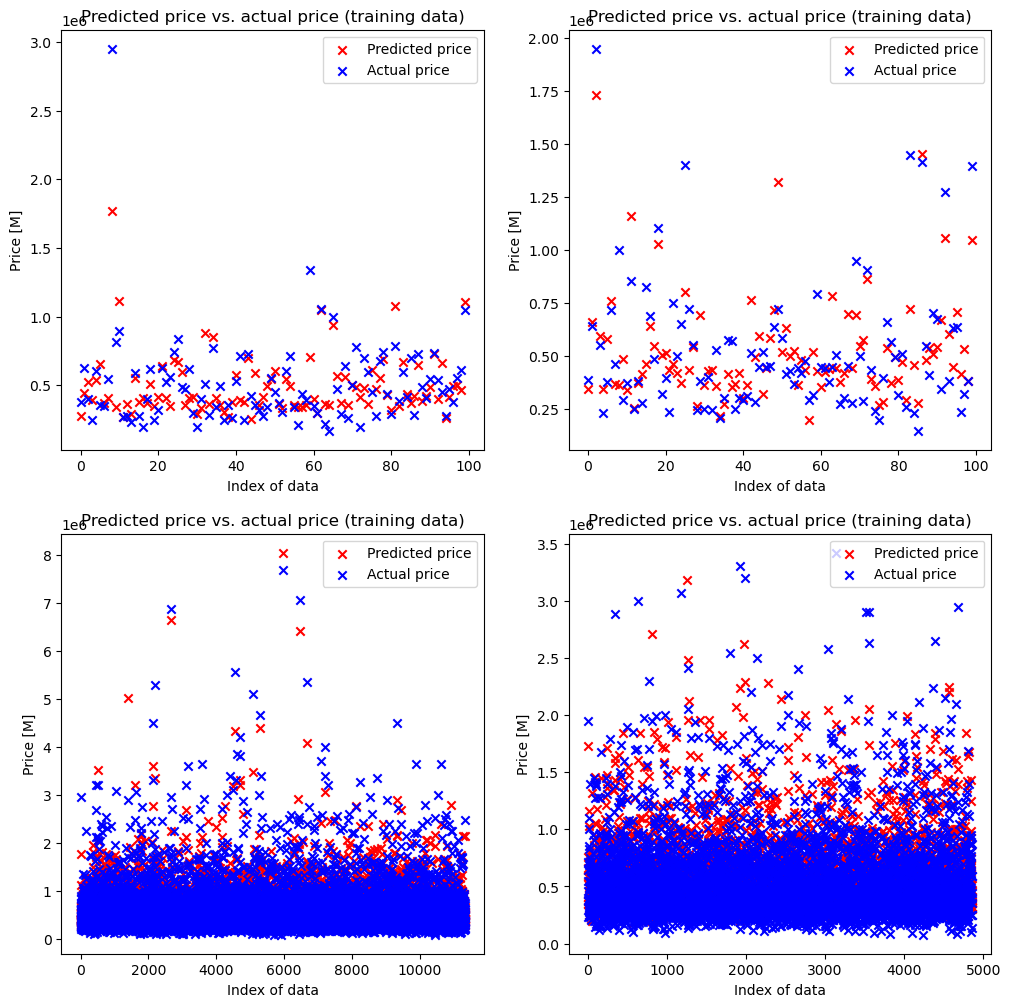

In [65]:
import matplotlib.pyplot as plt

# Take the first 100 samples from the training and test sets
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]
y_pred_train_100 = y_pred_train[:100]

X_test_100 = X_test[:100]
y_test_100 = y_test[:100]
y_pred_test_100 = y_pred_test[:100]

# Create a figure with two rows and two columns
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Plot the predicted prices and actual prices on the training set (using the first 100 samples)
ax[0, 0].scatter(range(len(y_pred_train_100)), y_pred_train_100, c='r', marker='x', label='Predicted price')
ax[0, 0].scatter(range(len(y_train_100)), y_train_100, c='b', marker='x', label='Actual price')
ax[0, 0].set_xlabel('Index of data')
ax[0, 0].set_ylabel('Price [M]')
ax[0, 0].set_title('Predicted price vs. actual price (training data)')
ax[0, 0].legend()

# Plot the predicted prices and actual prices on the test set (using the first 100 samples)
ax[0, 1].scatter(range(len(y_pred_test_100)), y_pred_test_100, c='r', marker='x', label='Predicted price')
ax[0, 1].scatter(range(len(y_test_100)), y_test_100, c='b', marker='x', label='Actual price')
ax[0, 1].set_xlabel('Index of data')
ax[0, 1].set_ylabel('Price [M]')
ax[0, 1].set_title('Predicted price vs. actual price (training data)')
ax[0, 1].legend()

ax[1, 0].scatter(range(len(y_pred_train)), y_pred_train, c='r', marker='x', label='Predicted price')
ax[1, 0].scatter(range(len(y_train)), y_train, c='b', marker='x', label='Actual price')
ax[1, 0].set_xlabel('Index of data')
ax[1, 0].set_ylabel('Price [M]')
ax[1, 0].set_title('Predicted price vs. actual price (training data)')
ax[1, 0].legend()

ax[1, 1].scatter(range(len(y_pred_test)), y_pred_test, c='r', marker='x', label='Predicted price')
ax[1, 1].scatter(range(len(y_test)), y_test, c='b', marker='x', label='Actual price')
ax[1, 1].set_xlabel('Index of data')
ax[1, 1].set_ylabel('Price [M]')
ax[1, 1].set_title('Predicted price vs. actual price (training data)')
ax[1, 1].legend()


In [68]:
# Test using k-fold be awared this action take really long time
# You can reduce the number of n_splits for better computational performance, but less accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
mean_score = scores.mean()
std_score = scores.std()

# Calculate the average error of the R2 scores
avg_error = std_score / np.sqrt(kfold.n_splits)

# Print the mean and average error of the R2 scores
print(f'R2: {mean_score:.2f} +/- {avg_error:.2f}')

C:\Users\timez\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.229e+14, tolerance: 1.909e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\timez\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.204e+14, tolerance: 1.878e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\timez\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.120e+14, toleranc

R2: 0.53 +/- 0.07


C:\Users\timez\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.208e+14, tolerance: 1.842e+11
  model = cd_fast.enet_coordinate_descent(


In [67]:
import joblib

joblib.dump( pipeline ,'best_model.pkl')

['best_model.pkl']